In [478]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
import seaborn as sns
import os.path

#initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

#twitter API Keys (load from untracked_api_key.txt)
with open('untracked_api_key_twitter.txt', 'r') as file_object:
    #Text document that is untracked in project-one directory (NOT pushed to git) with API key
    #Create a file called untracked_api_key.txt with your key and DO NOT add to git when commiting or pushing changes file_object.readline()
    consumer_key  = str(file_object.readline()).strip()
    consumer_secret = str(file_object.readline()).strip()
    access_token = str(file_object.readline()).strip()
    access_token_secret = str(file_object.readline()).strip()

#tweepy API authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [479]:
#target_user_list = ["@BBCNews", "@CBS", "@CNN", "@foxnews","@nytimes"]
target_user_list = ["@BTC","@ethereum","@Ripple"]

sentiments = []

# Loop through 5 pages of tweets (total 100 tweets)
for user in target_user_list:
        counter = 1
        #Obtain 200 recent tweets from home feed per user in target_user_list
        public_tweets = api.user_timeline(user, count = 200,result_type="recent")

        for tweet in public_tweets:
            # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            tweets_ago = counter

            # Add sentiments for each tweet into an array
            sentiments.append({"User":user,
                               "Date": tweet["created_at"], 
                               "Tweet": tweet["text"],
                               "Compound": compound,
                               "Positive": pos,
                               "Negative": neu,
                               "Neutral": neg,
                               "Tweets Ago": counter})
          
            # Add to counter 
            counter = counter + 1


In [491]:
#convert sentiment list into dataframe object
sentiments_pd = pd.DataFrame.from_dict(sentiments)
#reorder columns in dataframe
sentiments_pd = sentiments_pd[['User','Date','Tweet','Tweets Ago','Compound','Negative','Neutral','Positive']]

sentiments_pd.head(25)

,User,Date,Tweet,Tweets Ago,Compound,Negative,Neutral,Positive
0,@BTC,Thu Sep 13 08:49:51 +0000 2018,"RIP #Ethereum. “World computer,” we barely kne...",1,0.0000,1.000,0.000,0.000
1,@BTC,Thu Sep 13 05:58:31 +0000 2018,RT @bitcoinister: The Unflippening: #Bitcoin’s...,2,0.2023,0.847,0.000,0.153
2,@BTC,Thu Sep 13 05:27:33 +0000 2018,RT @LeahWald: QA to Roger Ver:\nQ: #BCH down 5...,3,0.0000,1.000,0.000,0.000
3,@BTC,Tue Sep 11 17:12:54 +0000 2018,Bcash is fiat. Money by decree and created out...,4,0.2500,0.857,0.000,0.143
4,@BTC,Tue Sep 11 07:54:19 +0000 2018,There’s nothing to debate. There is #Bitcoin a...,5,0.1027,0.931,0.000,0.069
5,@BTC,Tue Sep 11 05:05:53 +0000 2018,RT @alistairmilne: Things Bcash'ers say:\n- li...,6,0.7506,0.775,0.000,0.225
6,@BTC,Sun Sep 09 08:59:22 +0000 2018,"If you hear the words “Satoshi’s vision”, “wha...",7,-0.5719,0.844,0.156,0.000
7,@BTC,Sat Sep 08 21:05:51 +0000 2018,RT @danheld: The British pound is the oldest f...,8,0.0000,1.000,0.000,0.000
8,@BTC,Sat Sep 08 21:03:38 +0000 2018,"#Bitcoin, not #blockchain.",9,0.0000,1.000,0.000,0.000
9,@BTC,Thu Sep 06 09:08:48 +0000 2018,RT @BtcpayServer: We will probably stop suppor...,10,0.1779,0.779,0.095,0.126


In [481]:
# save sentiment data to csv
sentiments_pd.to_csv("TwitterMoodSentiment.csv")

In [482]:
sentiments_pd_grouped = sentiments_pd.groupby(['User'])
#sentiments_pd_grouped.count().head()
#for user in sentiments_pd_grouped["User"]:
#plt.scatter(sentiments_pd_grouped["Tweets Ago"],sentiments_pd_grouped["Compound"])
#plt.title("Sentiment Analysis of Media Tweets (%s)" % (time.strftime("%x")))
#plt.legend(sentiments_pd["User"])
#plt.ylabel("Tweet Polarity")
#plt.xlabel("Tweets Ago")
#plt.show()

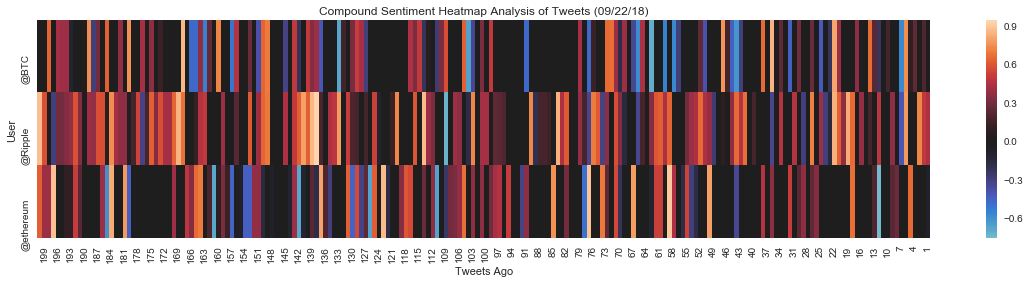

In [483]:
# Compound sentiment heatmap

from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 20,4
plt.title("Compound Sentiment Heatmap Analysis of Tweets (%s)" % (time.strftime("%x")))
sentiments_pd_p = sentiments_pd.pivot("User", "Tweets Ago", "Compound")
ax = sns.heatmap(sentiments_pd_p, center = 0)
ax.invert_xaxis()

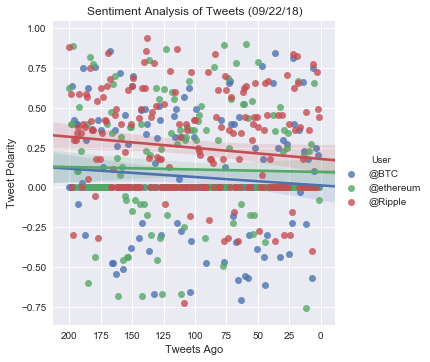

In [484]:

sns.lmplot("Tweets Ago", "Compound", data=sentiments_pd, hue='User', fit_reg=True)
plt.title("Sentiment Analysis of Tweets (%s)" % (time.strftime("%x")))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.gca().invert_xaxis()
plt.savefig("general_tweet_sentiment_scatter")
plt.show()

In [485]:
#sentiments_pd_grouped = sentiments_pd.groupby(['User'])
#color=["lightblue", 'green', 'red', 'blue', 'gold']
#plt.bar(sentiments_pd['User'], sentiments_pd['Compound'],color=["lightblue", 'green', 'red', 'blue', 'gold'])
#plt.title("Overall Media Sentiment of Tweets (%s)" % (time.strftime("%x")))
#plt.ylabel("Tweet Polarity")
#plt.xlabel("User Account")
#plt.legend(['Compound','Negative','Neutral','Positive'])
#color=["lightblue", 'green', 'red', 'blue', 'gold']
#sentiments_pd[['Compound','Negative','Neutral','Positive']]
#plt.legend()
#plt.savefig("overall_tweet_sentiment_bar")
#plt.show()

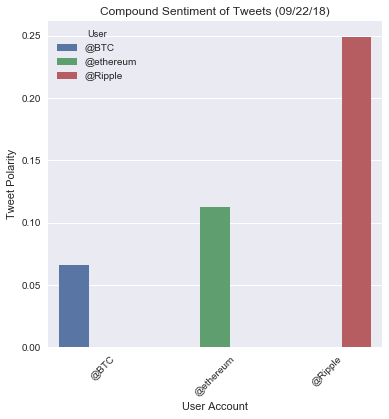

In [486]:
rcParams['figure.figsize'] = 6,6
sns.barplot("User", "Compound", data=sentiments_pd, hue='User',ci=None)
plt.title("Compound Sentiment of Tweets (%s)" % (time.strftime("%x")))
plt.ylabel("Tweet Polarity")
plt.xlabel("User Account")
plt.xticks(rotation=45)
plt.savefig("compound_tweet_sentiment_bar")
plt.show()